In [1]:
from lensid.utils.ml_utils import *

2021-09-02 21:27:57.743774: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory
2021-09-02 21:27:57.743826: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
#df_dir='../../data/dataframes/train/' ##alice
df_dir = '/home/srashti.goyal/strong-lensing-ml/data/dataframes/train/' ##CIT

# train XGB QTs

In [3]:
tag='_kaggle'
df_lensed_qts = pd.read_csv(df_dir+'lensed_QTs'+tag+'.csv',index_col=[0] )[:2400]
df_unlensed_qts_half = pd.read_csv(df_dir+'unlensed_half_QTs'+tag+'.csv' ,index_col=[0])
df_unlensed_qts_half = df_unlensed_qts_half.sample(frac = 1,random_state = 42).reset_index(drop = True)
df_train_qts = pd.concat([df_lensed_qts,df_unlensed_qts_half],ignore_index = True)
df_train_qts=df_train_qts.sample(frac = 1).reset_index(drop = True)

In [4]:
df_train_qts.tail()

,img_0,img_1,Lensing,dense_H1_0,mean_overlap_qts_H1,std_overlap_qts_H1,lsq_overlap_qts_H1,dense_L1_0,mean_overlap_qts_L1,std_overlap_qts_L1,lsq_overlap_qts_L1,dense_V1_0,mean_overlap_qts_V1,std_overlap_qts_V1,lsq_overlap_qts_V1
128146,130,235,0,0.139657,7513.831055,0.110038,4557.103027,0.571273,7227.126465,0.104796,5315.344238,0.259251,7237.747070,0.106094,4198.680176
128147,1,196,0,0.608426,7934.076172,0.115928,5253.086914,0.181904,7684.414551,0.110188,4953.636230,0.998550,7471.807617,0.110692,4355.901367
128148,221,480,0,0.005800,6174.480957,0.101919,6490.635742,0.000368,5849.270020,0.097751,5560.521973,0.432252,6418.318848,0.099696,5890.320312
128149,26,131,0,0.903420,7486.365234,0.114744,4144.098633,0.706892,7041.396973,0.109070,4629.976074,0.813841,7809.264648,0.114106,4643.513672
128150,6,376,0,0.111203,6238.395508,0.095206,7264.454102,0.684276,6797.617188,0.103500,5915.786621,0.513349,6797.266113,0.102653,4622.913086


In [5]:
xgboost_dense_qts_model=train_xgboost_dense_qts(df_train_qts,from_df=True,scale_pos_weight=1)

In [6]:
if not os.path.exists('out'):
        os.makedirs('out')

In [7]:
joblib_file = 'out/XGBQT_0'+tag+'.pkl'  
joblib.dump(xgboost_dense_qts_model, joblib_file)

['out/XGBQT_0_kaggle.pkl']

# validate XGB QTs

In [8]:
df_lensed_qts = pd.read_csv(df_dir+'lensed_QTs'+tag+'.csv',index_col=[0] )[2400:]
df_unlensed_qts_half = pd.read_csv(df_dir+'unlensed_second_half_QTs'+tag+'.csv' ,index_col=[0])
df_unlensed_qts_half = df_unlensed_qts_half.sample(frac = 1,random_state = 42).reset_index(drop = True)
df_val_qts = pd.concat([df_lensed_qts,df_unlensed_qts_half],ignore_index = True)
df_val_qts=df_val_qts.sample(frac = 1).reset_index(drop = True)

In [9]:
df_val_qts=predict_xgboost_dense_qts(df_val_qts,xgboost_dense_qts_model)

In [10]:
df_val_qts.tail()

,img_0,img_1,Lensing,dense_H1_0,mean_overlap_qts_H1,std_overlap_qts_H1,lsq_overlap_qts_H1,dense_L1_0,mean_overlap_qts_L1,std_overlap_qts_L1,lsq_overlap_qts_L1,dense_V1_0,mean_overlap_qts_V1,std_overlap_qts_V1,lsq_overlap_qts_V1,xgb_dense_QTS_0
126143,571,992,0,0.415900,7587.408203,0.109287,5314.280762,0.175936,7638.940430,0.111443,4679.782715,0.835154,7543.998047,0.110244,4964.498047,0.003862
126144,565,610,0,0.892326,8150.422363,0.114945,5606.193359,0.700193,7746.185547,0.110793,4502.932617,0.869293,7662.179688,0.111748,4957.778809,0.005690
126145,623,789,0,0.008994,7446.203125,0.108498,5404.814453,0.056159,7327.690430,0.106734,4985.316406,0.878221,7427.098633,0.108495,4366.319824,0.000256
126146,783,798,0,0.065389,7539.063965,0.109555,4637.509766,0.339635,7410.156250,0.108252,5198.359375,0.017946,6950.173340,0.103725,4140.454590,0.000020
126147,908,931,0,0.201248,6620.458984,0.100471,4504.422852,0.016307,6982.891602,0.104211,5236.754395,0.287267,7496.913574,0.109077,4532.158203,0.000077


dense_H1_0 auc = 0.9255
dense_L1_0 auc = 0.9266
dense_V1_0 auc = 0.8493
xgb_dense_QTS_0 auc = 0.9521


/home/srashti.goyal/.local/lib/python3.7/site-packages/lensid/utils/ml_utils.py:847: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(ylim, 1)


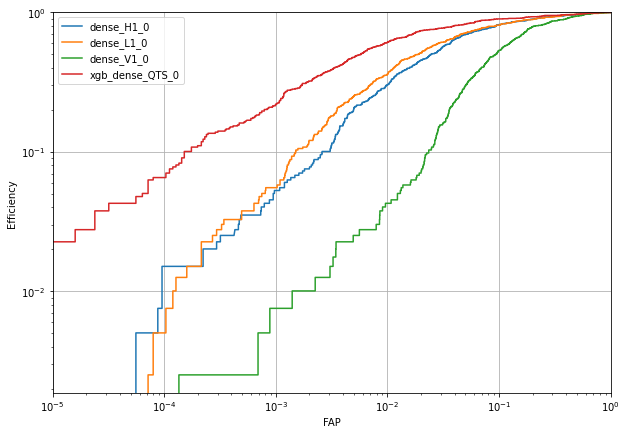

In [11]:
fig=plot_ROCs(df_val_qts,logy=True,cols=['dense_H1_0', 'dense_L1_0', 'dense_V1_0','xgb_dense_QTS_0'])

# cross-validate XGB QTs

In [12]:
df_lensed_qts = pd.read_csv(df_dir+'lensed_QTs'+tag+'.csv',index_col=[0] )[:2400]
df_unlensed_qts_half = pd.read_csv(df_dir+'unlensed_half_QTs'+tag+'.csv' ,index_col=[0])
df_unlensed_qts_second_half = pd.read_csv(df_dir+'unlensed_second_half_QTs'+tag+'.csv' ,index_col=[0])
#df_cv_qts = pd.concat([df_lensed_qts,df_unlensed_qts_half,df_unlensed_qts_second_half],ignore_index = True)
df_cv_qts = pd.concat([df_lensed_qts,df_unlensed_qts_half],ignore_index = True)

df_cv_qts=df_cv_qts.sample(frac = 1).reset_index(drop = True)

In [13]:
df_cv_qts.tail()

,img_0,img_1,Lensing,dense_H1_0,mean_overlap_qts_H1,std_overlap_qts_H1,lsq_overlap_qts_H1,dense_L1_0,mean_overlap_qts_L1,std_overlap_qts_L1,lsq_overlap_qts_L1,dense_V1_0,mean_overlap_qts_V1,std_overlap_qts_V1,lsq_overlap_qts_V1
128146,111,284,0,0.356593,7219.017578,0.107998,4039.062744,0.312767,7985.814453,0.117399,4445.039551,0.000382,7137.758301,0.107341,4366.798340
128147,223,435,0,0.927747,7743.447266,0.112561,4186.802734,0.389527,7911.532715,0.115875,5453.450195,0.065068,7104.683594,0.105847,4432.505859
128148,413,444,0,0.379302,7964.420898,0.112618,5479.742676,0.459667,7687.394531,0.108688,5192.909180,0.998883,6848.198242,0.103785,5373.778320
128149,37,310,0,0.004843,7071.796875,0.105665,4677.237305,0.074496,7343.943359,0.107575,5101.169922,0.707311,7794.012695,0.111393,4864.047363
128150,373,462,0,0.980355,7462.388672,0.109454,4703.968262,0.010714,7299.495117,0.106292,4844.538086,0.093681,7729.669922,0.110476,5071.197754


In [14]:
cv = StratifiedKFold(n_splits = 10)


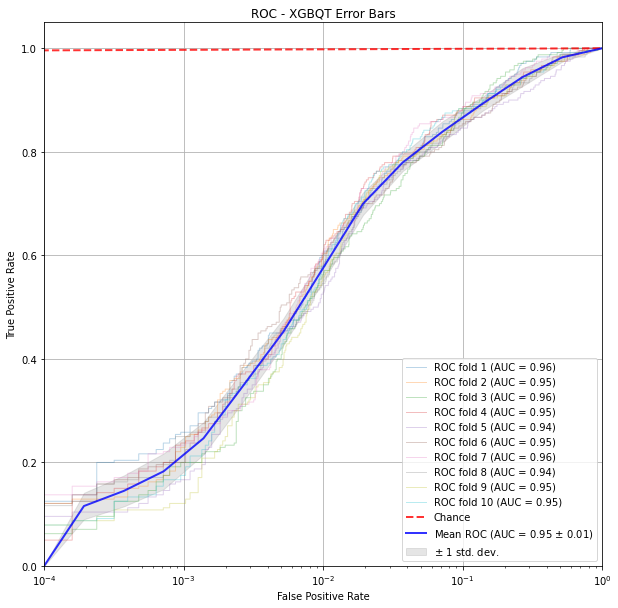

In [15]:
xgboost_dense_qts_models=[]
plt.rcParams["figure.figsize"] = (10,10)

tprs = []
aucs = []

mean_fpr = 10**np.linspace(-4,0,15)
fig,ax = plt.subplots()
cols=['dense_H1_0','dense_L1_0','dense_V1_0']
for i,(train_index, test_index) in enumerate(cv.split(df_cv_qts,df_cv_qts.Lensing.values)):
    xgboost_dense_qts_model=train_xgboost_dense_qts(df_cv_qts.iloc[train_index],from_df=True,n_estimators=135,
                      max_depth = 6, scale_pos_weight=1)
    joblib_file = "out/XGBQT_"+str(i+1)+tag+ ".pkl"  
    joblib.dump(xgboost_dense_qts_model, joblib_file)
    X=np.c_[df_cv_qts.iloc[test_index][cols]]
    viz = plot_roc_curve(xgboost_dense_qts_model,X,df_cv_qts.Lensing.values[test_index],name="ROC fold {}".format(i+1),alpha=0.3,lw=1,ax=ax)
    interp_tpr = np.interp(mean_fpr,viz.fpr,viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
        
ax.plot([0,1],[0,1],linestyle="--",lw = 2,color="r",label="Chance",alpha=0.8)
mean_tpr = np.mean(tprs,axis = 0)
mean_tpr[-1]=1.0
mean_auc = auc(mean_fpr,mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr,mean_tpr,color='b',label = r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc , std_auc),lw = 2,alpha=.8)
    
std_tpr = np.std(tprs,axis=0)
tprs_upper = np.minimum(mean_tpr +std_tpr,1)
tprs_lower = np.maximum(mean_tpr-std_tpr,0)
ax.fill_between(mean_fpr,tprs_lower,tprs_upper,color="grey",alpha=.2,label=r'$\pm$ 1 std. dev.')
    
ax.set(xlim=[1e-4,1],ylim=[0,1.05],
          title = "ROC - XGBQT Error Bars",xscale='log')
ax.legend(loc ="lower right")
#plt.savefig('ROC-XGB_QT'+tag+'.png')
plt.grid()
plt.show()

# Testing(debugging)

In [20]:
indir= 'test'
#df_dir='../../data/dataframes/test/' ##alice
df_dir = '/home/srashti.goyal/strong-lensing-ml/data/dataframes/test/' ##CIT

In [21]:
#blu_lensed = '../../data/dataframes/haris_et_al/Lensed_PE_blus.csv'
#blu_unlensed = '../../data/dataframes/haris_et_al/Unlensed_PE_blus.csv'

blu_lensed = '/home/srashti.goyal/strong-lensing-ml/data/dataframes/haris_et_al/Lensed_PE_blus.csv'
blu_unlensed = '/home/srashti.goyal/strong-lensing-ml/data/dataframes/haris_et_al/Unlensed_PE_blus.csv'



In [26]:
tag='_kaggle'
df_lensed_qts = pd.read_csv(df_dir+'lensed_QTs'+tag+'.csv',index_col=[0] )
df_unlensed_qts = pd.read_csv(df_dir+'unlensed_QTs'+tag+'.csv' ,index_col=[0])


df_test_blu_lensed = pd.read_csv(blu_lensed,index_col=[0] )
df_test_blu_unlensed = pd.read_csv(blu_unlensed,index_col=[0] )
cols=['m1, m2, ra, sin_dec, a1, a2, costilt1, costilt2, costheta_jn',
       'm1, m2, ra, sin_dec, costheta_jn', 'ra, sin_dec',
       '# m1, m2, ra, sin_dec, a1, a2, costilt1, costilt2',
       'm1, m2, ra, sin_dec', 'm1, m2']
df_lensed_qts=df_lensed_qts.join(df_test_blu_lensed[cols])
df_unlensed_qts=df_unlensed_qts.join(df_test_blu_unlensed[cols])
df_test_qts = pd.concat([df_lensed_qts,df_unlensed_qts],ignore_index = True)
df_test_qts=df_test_qts.sample(frac = 1).reset_index(drop = True)

In [27]:
df_test_qts.tail()

,img_0,img_1,Lensing,dense_H1_0,mean_overlap_qts_H1,std_overlap_qts_H1,lsq_overlap_qts_H1,dense_L1_0,mean_overlap_qts_L1,std_overlap_qts_L1,...,dense_V1_0,mean_overlap_qts_V1,std_overlap_qts_V1,lsq_overlap_qts_V1,"m1, m2, ra, sin_dec, a1, a2, costilt1, costilt2, costheta_jn","m1, m2, ra, sin_dec, costheta_jn","ra, sin_dec","# m1, m2, ra, sin_dec, a1, a2, costilt1, costilt2","m1, m2, ra, sin_dec","m1, m2"
499787,616644500.000000000-233289,627381500.000000000-254763,0,0.840339,7149.238281,0.107359,4720.675781,0.027961,7351.779297,0.109158,...,0.112011,7869.400391,0.114993,4747.774902,8.600599e-212,0.000000e+00,0.000000,1.209938e-238,0.000000e+00,7.352508e-02
499788,532986000.000000000-65972,693849000.000000000-387698,0,0.108000,7506.585938,0.109281,4192.849609,0.413595,7080.777344,0.104022,...,0.785893,7935.625488,0.114236,4710.422852,1.580575e-12,1.316643e-07,0.003763,9.742792e-12,8.079788e-06,1.041311e-01
499789,511541500.000000000-23083,521658000.000000000-43316,0,0.060661,7337.170898,0.110634,5040.249023,0.000215,6311.310547,0.098602,...,0.017074,7013.840820,0.110789,5183.331055,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,6.537896e-182
499790,684588500.000000000-369177,570135500.000000000-140271,0,0.989811,6580.463867,0.102789,5309.110352,0.962866,6380.983398,0.100058,...,0.994334,7789.645020,0.113625,5109.035156,3.670191e-49,2.977195e-36,0.193323,2.847729e-51,6.942316e-37,2.566244e-31
499791,625924500.000000000-251849,550492000.000000000-100984,0,0.610944,6800.362305,0.101343,5513.996094,0.207743,6647.455078,0.099854,...,0.231387,7359.390625,0.105922,5030.790039,2.574542e-12,3.579946e-10,0.007049,3.365701e-12,2.819541e-10,8.990119e-12


In [28]:
xgboost_dense_qts_model = joblib.load('out/XGBQT_0'+tag+'.pkl')

In [29]:
df_test_qts=predict_xgboost_dense_qts(df_test_qts,xgboost_dense_qts_model)
df_test_qts.tail()

,img_0,img_1,Lensing,dense_H1_0,mean_overlap_qts_H1,std_overlap_qts_H1,lsq_overlap_qts_H1,dense_L1_0,mean_overlap_qts_L1,std_overlap_qts_L1,...,mean_overlap_qts_V1,std_overlap_qts_V1,lsq_overlap_qts_V1,"m1, m2, ra, sin_dec, a1, a2, costilt1, costilt2, costheta_jn","m1, m2, ra, sin_dec, costheta_jn","ra, sin_dec","# m1, m2, ra, sin_dec, a1, a2, costilt1, costilt2","m1, m2, ra, sin_dec","m1, m2",xgb_dense_QTS_0
499787,616644500.000000000-233289,627381500.000000000-254763,0,0.840339,7149.238281,0.107359,4720.675781,0.027961,7351.779297,0.109158,...,7869.400391,0.114993,4747.774902,8.600599e-212,0.000000e+00,0.000000,1.209938e-238,0.000000e+00,7.352508e-02,0.000152
499788,532986000.000000000-65972,693849000.000000000-387698,0,0.108000,7506.585938,0.109281,4192.849609,0.413595,7080.777344,0.104022,...,7935.625488,0.114236,4710.422852,1.580575e-12,1.316643e-07,0.003763,9.742792e-12,8.079788e-06,1.041311e-01,0.000179
499789,511541500.000000000-23083,521658000.000000000-43316,0,0.060661,7337.170898,0.110634,5040.249023,0.000215,6311.310547,0.098602,...,7013.840820,0.110789,5183.331055,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,6.537896e-182,0.000006
499790,684588500.000000000-369177,570135500.000000000-140271,0,0.989811,6580.463867,0.102789,5309.110352,0.962866,6380.983398,0.100058,...,7789.645020,0.113625,5109.035156,3.670191e-49,2.977195e-36,0.193323,2.847729e-51,6.942316e-37,2.566244e-31,0.256612
499791,625924500.000000000-251849,550492000.000000000-100984,0,0.610944,6800.362305,0.101343,5513.996094,0.207743,6647.455078,0.099854,...,7359.390625,0.105922,5030.790039,2.574542e-12,3.579946e-10,0.007049,3.365701e-12,2.819541e-10,8.990119e-12,0.001386


In [30]:
df_test_qts=df_test_qts.dropna()

ML H1 QTs auc = 0.8790
ML L1 QTs auc = 0.8695
ML V1 QTs auc = 0.8018
ML combined H1 L1 V1 QTS auc = 0.9021
$B^L_U:$ $m_1 m_2$ auc = 0.9164


/home/srashti.goyal/.local/lib/python3.7/site-packages/lensid/utils/ml_utils.py:847: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(ylim, 1)


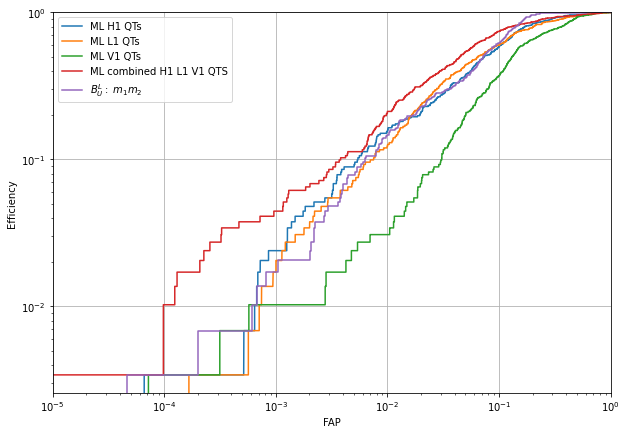

In [31]:
fig=plot_ROCs(df_test_qts,cols=['dense_H1_0' ,'dense_L1_0','dense_V1_0','xgb_dense_QTS_0','m1, m2']\
                     ,labels=['ML H1 QTs', 'ML L1 QTs', 'ML V1 QTs','ML combined H1 L1 V1 QTS', '$B^L_U:$ $m_1 m_2$'],logy=True)

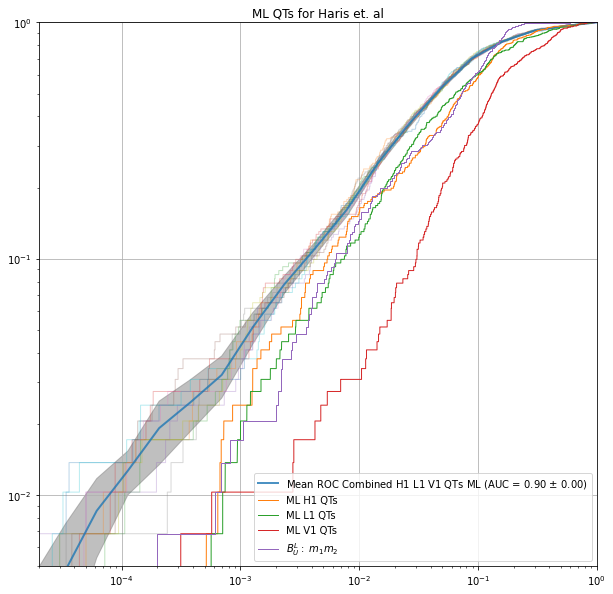

In [32]:
from sklearn.metrics import plot_roc_curve
plt.rcParams["figure.figsize"] = (10,10)

tprs = []
aucs = []

mean_fpr = 10**np.linspace(-5,0,20)
    
fig,ax = plt.subplots()
cols=['dense_H1_0','dense_L1_0','dense_V1_0']

for i in range(1,11):
    xgb_qt_cv = joblib.load("../training_cv/out/XGBQT_"+str(i)+tag+".pkl")
    df = predict_xgboost_dense_qts(df_test_qts,xgb_qt_cv)
    df_test_qts['xgb_dense_QTS_' +str(i) ]=df['xgb_dense_QTS_0']

    false_positive_rate, true_positive_rate, thresholds = roc_curve(df_test_qts.Lensing.values, df_test_qts['xgb_dense_QTS_' +str(i)])
    roc_auc = auc(false_positive_rate, true_positive_rate)
    ax.plot(false_positive_rate,true_positive_rate,alpha=0.3,lw=1)
    interp_tpr = np.interp(mean_fpr,false_positive_rate,true_positive_rate)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(roc_auc)
    

    
mean_tpr = np.mean(tprs,axis = 0)
mean_tpr[-1]=1.0
mean_auc = auc(mean_fpr,mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr,mean_tpr,label = r'Mean ROC Combined H1 L1 V1 QTs ML (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc , std_auc),lw = 2,alpha=.8)
    
std_tpr = np.std(tprs,axis=0)
tprs_upper = np.minimum(mean_tpr +std_tpr,1)
tprs_lower = np.maximum(mean_tpr-std_tpr,0)
ax.fill_between(mean_fpr,tprs_lower,tprs_upper,color="grey",alpha=.5)


colors=['C0','C1','C2','C3','C4','C5','C6','C7','C8','C9']
cols=['dense_H1_0' ,'dense_L1_0','dense_V1_0','m1, m2']

labels=['ML H1 QTs', 'ML L1 QTs', 'ML V1 QTs', '$B^L_U:$ $m_1 m_2$']

for i,col in enumerate(cols):
    false_positive_rate, true_positive_rate, thresholds = roc_curve(df_test_qts.Lensing.values, df_test_qts[col])
    plt.plot(false_positive_rate,true_positive_rate,'-',label=labels[i],lw=1)

#ax.set(xlim=[2e-5,1],ylim=[-0.05,1.05],title = "ML Skymaps for Haris et. al",xscale='log')

ax.set(xlim=[2e-5,1],ylim=[5e-3,1],title = "ML QTs for Haris et. al",xscale='log',yscale='log')
ax.grid()
ax.legend(loc ="lower right")
#plt.savefig('ROC-log-QTs-xgb'+tag+'.png')

plt.show()


In [33]:
df_test_qts.tail()

,img_0,img_1,Lensing,dense_H1_0,mean_overlap_qts_H1,std_overlap_qts_H1,lsq_overlap_qts_H1,dense_L1_0,mean_overlap_qts_L1,std_overlap_qts_L1,...,xgb_dense_QTS_1,xgb_dense_QTS_2,xgb_dense_QTS_3,xgb_dense_QTS_4,xgb_dense_QTS_5,xgb_dense_QTS_6,xgb_dense_QTS_7,xgb_dense_QTS_8,xgb_dense_QTS_9,xgb_dense_QTS_10
499787,616644500.000000000-233289,627381500.000000000-254763,0,0.840339,7149.238281,0.107359,4720.675781,0.027961,7351.779297,0.109158,...,0.000341,0.000063,0.000156,0.000135,0.000113,0.000087,0.000080,0.000177,0.000301,0.000199
499788,532986000.000000000-65972,693849000.000000000-387698,0,0.108000,7506.585938,0.109281,4192.849609,0.413595,7080.777344,0.104022,...,0.000331,0.000433,0.000214,0.000182,0.000060,0.000135,0.000155,0.000115,0.000220,0.000131
499789,511541500.000000000-23083,521658000.000000000-43316,0,0.060661,7337.170898,0.110634,5040.249023,0.000215,6311.310547,0.098602,...,0.000012,0.000004,0.000008,0.000014,0.000005,0.000015,0.000011,0.000003,0.000005,0.000003
499790,684588500.000000000-369177,570135500.000000000-140271,0,0.989811,6580.463867,0.102789,5309.110352,0.962866,6380.983398,0.100058,...,0.171477,0.299450,0.244690,0.138859,0.170251,0.147385,0.416872,0.159218,0.206325,0.141087
499791,625924500.000000000-251849,550492000.000000000-100984,0,0.610944,6800.362305,0.101343,5513.996094,0.207743,6647.455078,0.099854,...,0.002017,0.004698,0.001540,0.002096,0.001132,0.001981,0.001119,0.000935,0.001815,0.000666


In [35]:
#df_test_qts.to_csv('../../data/dataframes/test/ML_qts'+tag+'.csv')
df_test_qts.to_csv('/home/srashti.goyal/strong-lensing-ml/data/dataframes/test/ML_qts'+tag+'.csv')

/home/srashti.goyal/.local/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


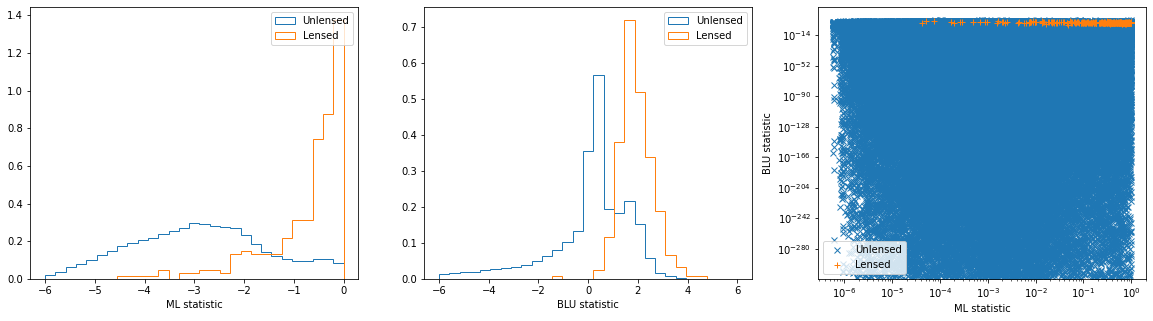

In [36]:
df_test=df_test_qts
ml_stat='xgb_dense_QTS_0'
blu_stat= 'm1, m2'
plt.figure(figsize=(20,5))
plt.subplot(131)
plt.xlabel('ML statistic')
bins=np.linspace(-6,0,30)
#plt.ylim(-100,1e3)
df=df_test[df_test['Lensing'] == 0]
plt.hist(np.log10(df[ml_stat]),bins=bins,label='Unlensed', histtype='step',density=True)
df=df_test[df_test['Lensing'] == 1]
plt.hist(np.log10(df[ml_stat]),bins=bins,label='Lensed', histtype='step',density=True)
plt.legend()
#plt.ylim(0,300)
plt.subplot(132)
plt.xlabel('BLU statistic')
bins=np.linspace(-6,6,30)
#plt.ylim(-100,1e3)
df=df_test[df_test['Lensing'] == 0]
plt.hist(np.log10(df[blu_stat]),bins=bins,label='Unlensed', histtype='step',density=True)
df=df_test[df_test['Lensing'] == 1]
plt.hist(np.log10(df[blu_stat]),bins=bins,label='Lensed', histtype='step',density=True)
plt.legend()
#plt.ylim(0,300)
plt.subplot(133)

plt.xlabel('ML statistic')
plt.ylabel('BLU statistic')
#plt.ylim(-100,1e3)
df=df_test[df_test['Lensing'] == 0]
plt.loglog(df[ml_stat],df[blu_stat],'x',label='Unlensed')
df=df_test[df_test['Lensing'] == 1]
plt.loglog(df[ml_stat],df[blu_stat],'+',label='Lensed')
plt.legend()
plt.show()


/home/srashti.goyal/.local/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


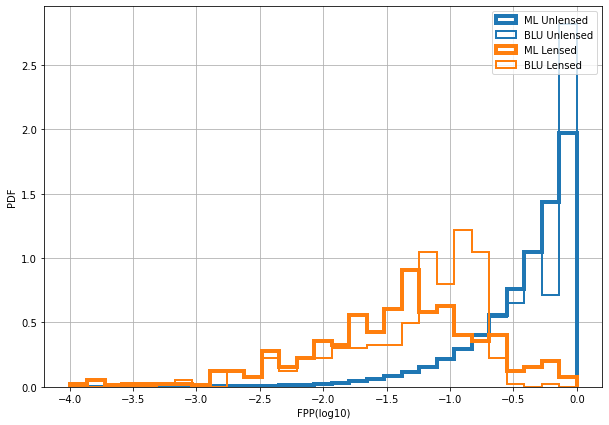

In [37]:
plt.figure(figsize=(10,7))
df_test[ml_stat+'_fpp']=get_fars(df_test,ml_stat,df_test,ml_stat)
df_test[blu_stat+'_fpp']=get_fars(df_test,blu_stat,df_test,blu_stat)
bins=np.linspace(-4,0,30)
#plt.ylim(-100,1e3)
df=df_test[df_test['Lensing'] == 0]
plt.hist(np.log10(df[ml_stat+'_fpp']),bins=bins,label='ML Unlensed', histtype='step',density=True,color='C0',lw=4)
plt.hist(np.log10(df[blu_stat+'_fpp']),bins=bins,label='BLU Unlensed', histtype='step',density=True,color='C0',lw=2)

df=df_test[df_test['Lensing'] == 1]
plt.hist(np.log10(df[ml_stat+'_fpp']),bins=bins,label='ML Lensed', histtype='step',density=True,color='C1',lw=4)
plt.hist(np.log10(df[blu_stat+'_fpp']),bins=bins,label='BLU Lensed', histtype='step',density=True,color='C1',lw=2)

plt.legend()
plt.xlabel('FPP(log10)')
plt.ylabel('PDF')
plt.grid()
plt.show()

ML H1 QTs auc = 0.8790
ML L1 QTs auc = 0.8695
ML V1 QTs auc = 0.8018
ML combined H1 L1 V1 QTS auc = 0.9040
$B^L_U:$ $m_1 m_2$ auc = 0.9164


/home/srashti.goyal/.local/lib/python3.7/site-packages/lensid/utils/ml_utils.py:847: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(ylim, 1)


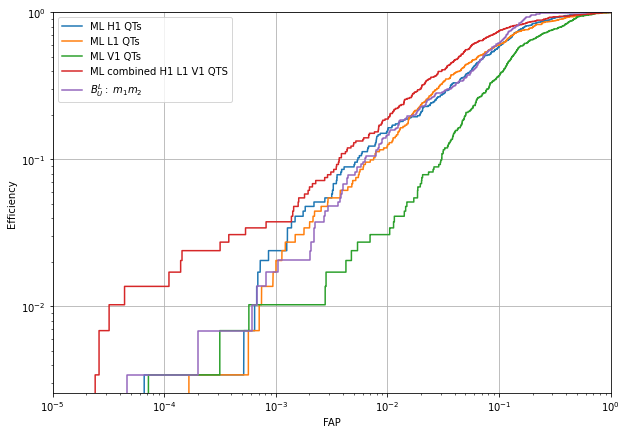

In [38]:
fig,rocs=plot_ROCs(df_test_qts,cols=['dense_H1_0' ,'dense_L1_0','dense_V1_0','xgb_dense_QTS_0','m1, m2']\
                     ,labels=['ML H1 QTs', 'ML L1 QTs', 'ML V1 QTs','ML combined H1 L1 V1 QTS', '$B^L_U:$ $m_1 m_2$'],logy=True)

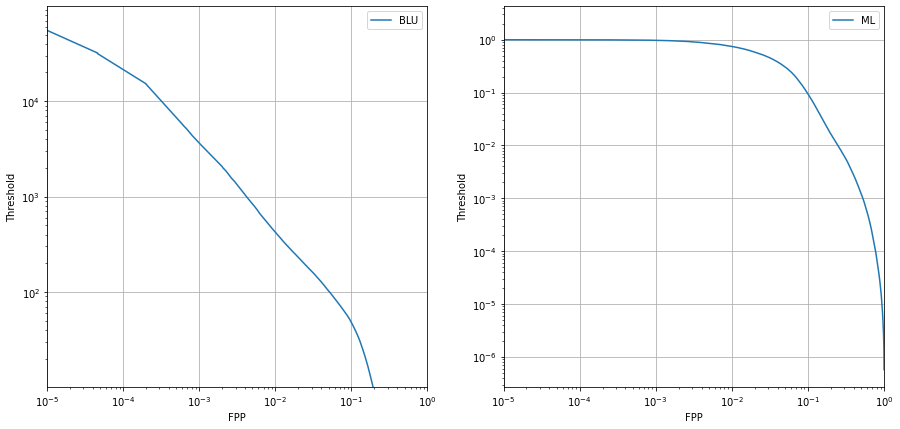

In [39]:
fpp_blu,eff_blu,thr_blu=rocs[blu_stat]
fpp_ml,eff_ml,thr_ml=rocs[ml_stat]

plt.figure(figsize=(15,7))
plt.subplot(121)
plt.plot(fpp_blu,thr_blu,label='BLU')
plt.xscale('log')
plt.xlim(1e-5,1)
plt.yscale('log')
plt.ylim(np.percentile(thr_blu,10),np.max(thr_blu))
plt.legend()
plt.xlabel('FPP')
plt.ylabel('Threshold')
plt.grid()
plt.subplot(122)
plt.plot(fpp_ml,thr_ml,label='ML')
plt.xscale('log')
plt.xlim(1e-5,1)
plt.yscale('log')
plt.grid()
plt.legend()
plt.xlabel('FPP')
plt.ylabel('Threshold')
plt.show()

In [40]:
#df_test_qts.to_csv('../../data/dataframes/test/ML_qts'+tag+'.csv')
df_test_qts.to_csv('/home/srashti.goyal/strong-lensing-ml/data/dataframes/test/ML_qts'+tag+'.csv')